<a href="https://colab.research.google.com/github/Damntoochill/Learning-ML/blob/master/Tensorflow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing dependencies
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
#downloading data directly
data = tf.keras.datasets.mnist

#dividing the data into train and test
(x_train,y_train), (x_test,y_test) = data.load_data()

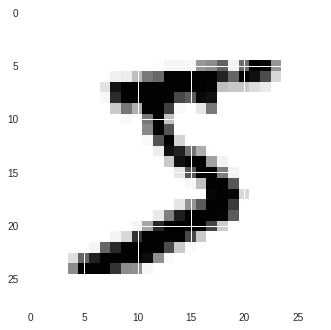

In [4]:
plt.imshow(x_train[0])
plt.show()

In [5]:
#the dataset is nothing but an array of values. So lets see what's in it
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

x_train[0] is a 28x28 matrix. The values in the matrix range from 0 - 255. The neural network can learn faster if the values are between (0,,1). So, let's normalise it.

In [0]:
#normalization
x_train = tf.keras.utils.normalize(x_train, axis = 0)
x_test = tf.keras.utils.normalize(x_test,axis = 0)

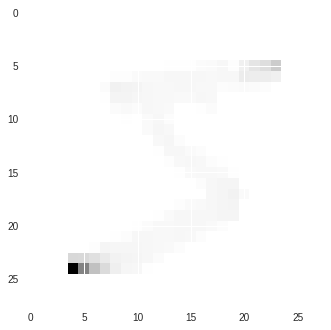

In [8]:
#let's check how the image looks after normalization
plt.imshow(x_train[0])
plt.show()

why do some pixels are still black? Let's check

In [9]:
print(x_train[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

Can't understand why. Let's not waste time on this :(

In [0]:
#creating a model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())#Flattens the input
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))#hidden layer 1
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))#hidden layer 2
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))#output layer

**Flatten** : If inputs are shaped (batch,) without a channel dimension, then flattening adds an extra channel dimension and output shapes are (batch, 1).

In [11]:
#compiling the model
model.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
#training the model
model.fit(x_train, y_train,epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 9s 155us/sample - loss: 0.5686 - acc: 0.8334
Epoch 2/3
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2677 - acc: 0.9216
Epoch 3/3
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2080 - acc: 0.9388


In [19]:
#evaluating the model on the test set
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 53us/sample - loss: 0.2659 - acc: 0.9398
0.26588178882119246 0.9398


In [0]:
#saving the model
model.save('mnist.model')

In [22]:
#loading the saved model
new_model = tf.keras.models.load_model('mnist.model')

In [0]:
import numpy as np
x_test = np.array(x_test)
new_Predictions = new_model.predict(x_test)

In [29]:
print(new_Predictions)

[[4.06095673e-08 1.46321909e-14 2.78161260e-05 ... 9.99801815e-01
  2.81718826e-09 1.85971061e-07]
 [1.26265098e-09 4.34493970e-08 9.99895811e-01 ... 3.12376590e-18
  1.89467659e-08 4.97102926e-19]
 [1.99748662e-10 9.99675989e-01 2.17600507e-04 ... 3.80896518e-06
  8.07709876e-05 5.21364640e-08]
 ...
 [2.54005428e-14 3.61750662e-14 2.97960137e-12 ... 4.25281357e-08
  1.04135936e-04 7.66355661e-04]
 [5.93329330e-10 1.29101313e-10 4.56687029e-14 ... 8.33674560e-14
  3.76357697e-03 4.92300256e-10]
 [2.35329534e-10 7.29930849e-19 9.55784757e-11 ... 4.61628830e-22
  2.60832039e-14 3.79957724e-20]]


In [31]:
print(np.argmax(new_Predictions[2]))

1


In [32]:
print(y_test[2])

1
